In [227]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [228]:
from tensorflow.keras.datasets import mnist

In [229]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [230]:
x_train.shape

(60000, 28, 28)

In [246]:
img = cv2.imread("9.png")


In [247]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
inv = 255 - gray_image


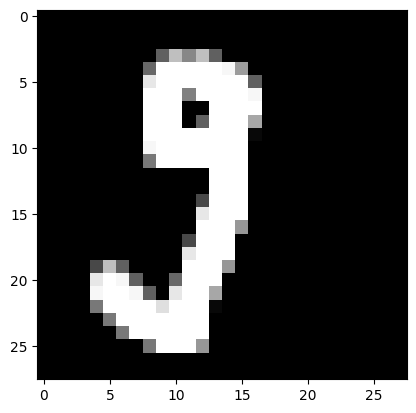

In [248]:
plt.imshow(inv, cmap = "gray")

In [249]:


# img = tf.convert_to_tensor(img)
# img = tf.reshape(img, shape = (28, 28))

In [250]:
inv = inv/255


In [251]:
inv= np.array(inv)

In [252]:
inv.shape


(28, 28)

In [238]:
model = tf.keras.Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
 
print(model.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

None


In [239]:
x_train = x_train / 255
x_test = x_test / 255


In [240]:
y_train_cat = keras.utils.to_categorical(y_train)
y_test_cat = keras.utils.to_categorical(y_test)

In [241]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [242]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=7, validation_split=0.2)

Epoch 1/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8604 - loss: 0.4852 - val_accuracy: 0.9572 - val_loss: 0.1483
Epoch 2/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9628 - loss: 0.1289 - val_accuracy: 0.9603 - val_loss: 0.1232
Epoch 3/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9741 - loss: 0.0889 - val_accuracy: 0.9727 - val_loss: 0.0941
Epoch 4/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9818 - loss: 0.0616 - val_accuracy: 0.9710 - val_loss: 0.0959
Epoch 5/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9862 - loss: 0.0458 - val_accuracy: 0.9729 - val_loss: 0.0942
Epoch 6/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9886 - loss: 0.0363 - val_accuracy: 0.9750 - val_loss: 0.0881
Epoch 7/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9908 - loss: 0.0297 - val_accuracy: 0.9735 - val_loss: 0.0923


In [243]:
model.evaluate(x_test, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9691 - loss: 0.1059   


[0.08785239607095718, 0.9747999906539917]

In [253]:

x = np.expand_dims(inv, axis=0)
res = model.predict(x)
print( res )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
[[1.9136632e-12 1.6670565e-05 1.4068745e-03 9.9798453e-01 4.0977975e-17
  2.0056967e-05 1.2625197e-14 4.0739351e-07 5.6246773e-04 9.0661615e-06]]


In [254]:
print(  np.argmax(res) )

3
